In [1]:
import os
os.chdir("/Users/Clair/machine_learning_sp20")

In [52]:
import numpy as np
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
#################################################################
# DATASET #3
#################################################################
road_columns = ["id", "longitude", "latitude", "altitude"]
spn_data = pd.read_csv("3D_spatial_network.txt", delimiter=",", names=road_columns, header=None)

,id,longitude,latitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974
...,...,...,...,...
434869,93323205,9.936479,57.499686,20.134033
434870,93323205,9.935696,57.499426,20.580884
434871,93323205,9.935009,57.499282,19.733141
434872,93323209,9.943479,57.495919,24.027015


In [4]:
spn_targets = spn_data["altitude"]
spn_data = spn_data.drop(columns=["altitude", "id"])

spn_data = spn_data[:].values

In [5]:
train_data, test_data, train_targets, test_targets = train_test_split(spn_data, spn_targets, 
                                                                      test_size = 0.3, shuffle = True)

In [47]:
classifier = Sequential()

In [48]:
classifier.add(Dense(input_dim=2, units=6, activation='relu'))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))

classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [49]:
# Compile model
classifier.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.RMSprop(), metrics=['mean_absolute_error'])

# Fit the model
ep = 50
history = classifier.fit(train_data, train_targets,
                    epochs=ep,
                    validation_data=(test_data, test_targets))

Train on 304411 samples, validate on 130463 samples
Epoch 1/10
304411/304411 [==============================] - 10s 33us/step - loss: 795.5236 - mean_absolute_error: 21.1857 - val_loss: 795.6334 - val_mean_absolute_error: 21.2130
Epoch 2/10
304411/304411 [==============================] - 11s 36us/step - loss: 795.3716 - mean_absolute_error: 21.1822 - val_loss: 795.6334 - val_mean_absolute_error: 21.2130
Epoch 3/10
304411/304411 [==============================] - 12s 38us/step - loss: 795.3716 - mean_absolute_error: 21.1821 - val_loss: 795.6334 - val_mean_absolute_error: 21.2130
Epoch 4/10
304411/304411 [==============================] - 11s 37us/step - loss: 795.3716 - mean_absolute_error: 21.1821 - val_loss: 795.6334 - val_mean_absolute_error: 21.2130
Epoch 5/10
304411/304411 [==============================] - 11s 37us/step - loss: 795.3716 - mean_absolute_error: 21.1820 - val_loss: 795.6334 - val_mean_absolute_error: 21.2130
Epoch 6/10
304411/304411 [==============================] 

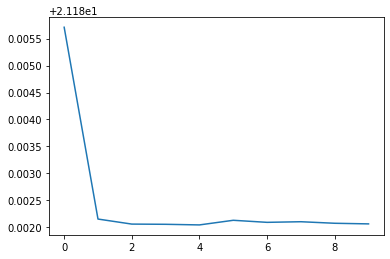

In [55]:
history.history.keys()
plt.plot(history.history['mean_absolute_error'])
plt.show()